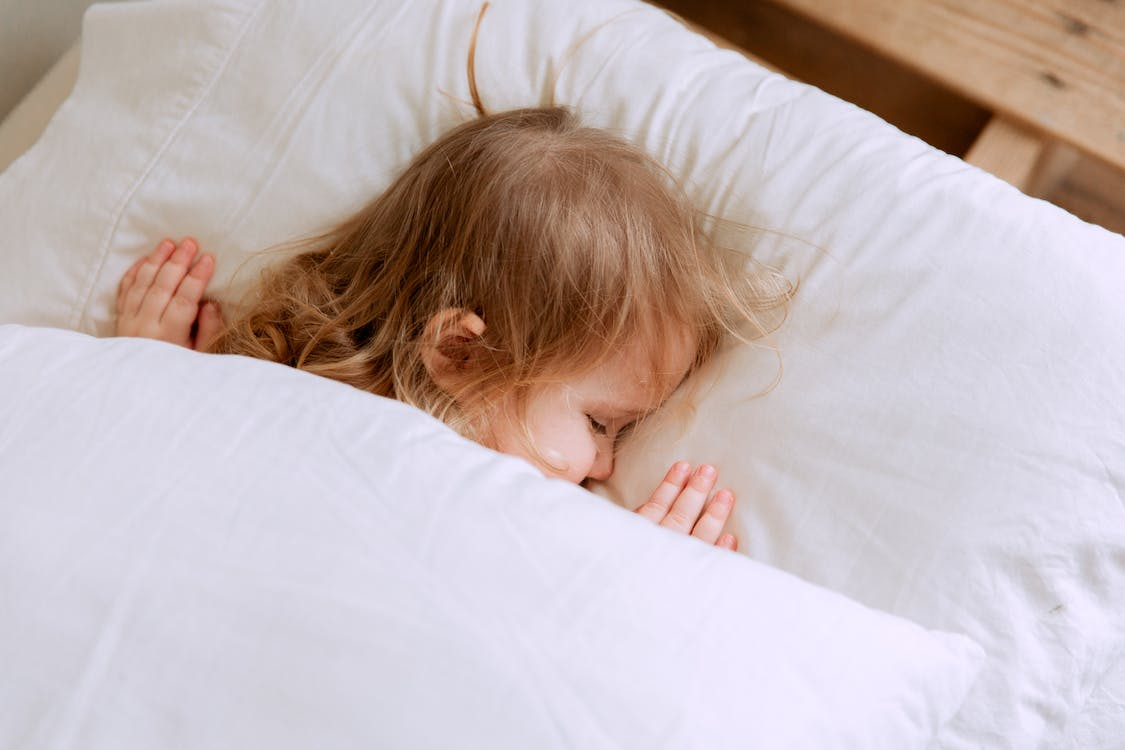

<div style="padding:20px;color:#DfB078;margin:0;font-size:300%;text-align:center;display:fill;border-radius:5px;background-color:#010012;overflow:hidden;font-weight:800"> 🧒Sleep States Child || Analysis and visualization </div>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
import pyarrow.parquet as pq

In [ ]:
train_events = pd.read_csv('/kaggle/input/child-mind-institute-detect-sleep-states/train_events.csv')

In [ ]:
train_events

In [ ]:
print('************************************************','Rows and Columns of Train Events', train_events.shape,'************************************************')
print('***********************************************','Missing values in Train Events data', train_events.isna().any().any(),'************************************************')
print('************************************************','Missing Values in Train Events', train_events[train_events.duplicated()].sum(),'************************************************')

In [ ]:
print('************************************************\n',train_events['event'].value_counts(), '\n************************************************')
plt.figure(figsize=(4,4))

ax = sns.countplot(data=train_events, x='event')
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
print('************************************************\n',train_events['night'].value_counts(), '\n************************************************')
plt.figure(figsize=(6,4))

ax = plt.plot(list(train_events['night']))
plt.show()

In [ ]:
parquet_train_file = '/kaggle/input/child-mind-institute-detect-sleep-states/train_series.parquet'
train_file = pq.read_table(parquet_train_file).to_pandas()
# print(train_file)
parquet_test_file = '/kaggle/input/child-mind-institute-detect-sleep-states/test_series.parquet'
test_file = pq.read_table(parquet_test_file).to_pandas()
display(train_file)
display(test_file)

In [ ]:
train_events

In [ ]:
train_events['date'] = train_events['timestamp'].str.split('T', expand=True)[0]
train_events['time'] = train_events['timestamp'].str.split('T', expand=True)[1].str.split('-', expand=True)[0]
train_events['timestamp'] = pd.to_datetime(train_events['date']+' '+train_events['time'])
train_events['hour'] = train_events['timestamp'].dt.hour

In [ ]:
train_events

In [ ]:
plt.figure(figsize=(6, 6))
plt.title('Hours Distribution')
sns.kdeplot(train_events['hour'],color='red');

In [ ]:
sns.jointplot(data=train_events, x='hour', y='event')
# sns.jointplot(data=train_data, x='fixed acidity', y='event')
sns.jointplot(data=train_events, x='step', y='event')
sns.jointplot(data=train_events, x='night', y='event')

In [ ]:
len(train_events.columns)

In [ ]:
train_events.dtypes.value_counts().plot.pie(autopct='%0.2f%%')

In [ ]:
from sklearn.preprocessing import LabelEncoder
train_events_new = train_events.drop(['series_id', 'timestamp'], axis='columns')
string_col = train_events_new.select_dtypes(include=('object')).columns
l_e = LabelEncoder()
for col in string_col:
    train_events_new[col] = l_e.fit_transform(train_events_new[col].astype('str'))

train_for_box_plot = train_events
string_col1 = train_for_box_plot.select_dtypes(include=('object')).columns
l_e = LabelEncoder()
for col in string_col1:
    train_for_box_plot[col] = l_e.fit_transform(train_for_box_plot[col].astype('str'))

In [ ]:
fig, axs = plt.subplots(3,2, figsize=(16,12))

for f, ax in zip(train_events_new,axs.ravel()):
    sns.boxplot(data=train_for_box_plot, x='event',y= f, ax=ax)
plt.suptitle("The Relationship between features and target", y=1.02, size=18)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=train_events,x="event",y="hour",color="red",label="onset")
sns.lineplot(data=train_events,x="event",y="time",color="blue",label="wakeup")

### Visit Related Health Datasets

#### 1. Global COVID 19 Dataset 
https://www.kaggle.com/datasets/meeratif/full-grouped

#### 2. Pakistan COVID 19 Dataset
https://www.kaggle.com/datasets/meeratif/pakistan-covid-dataset

### Wages 
#### 1. Countries by Average Wages Monthly and Yearly
https://www.kaggle.com/datasets/meeratif/list-of-countries-by-average-wage-monthly-yearly